In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

(train_x, train_y), (test_x, test_y) = tf.keras.datasets.fashion_mnist.load_data()
print(train_x.shape)
print(test_x.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


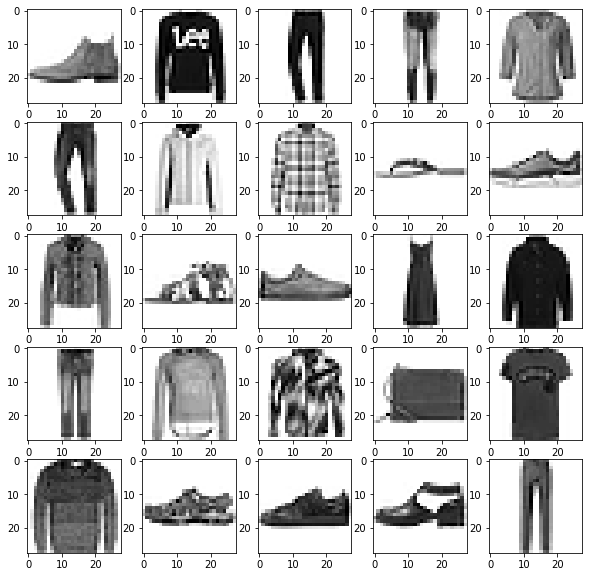

In [3]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(test_x[i], cmap="binary")

plt.show()

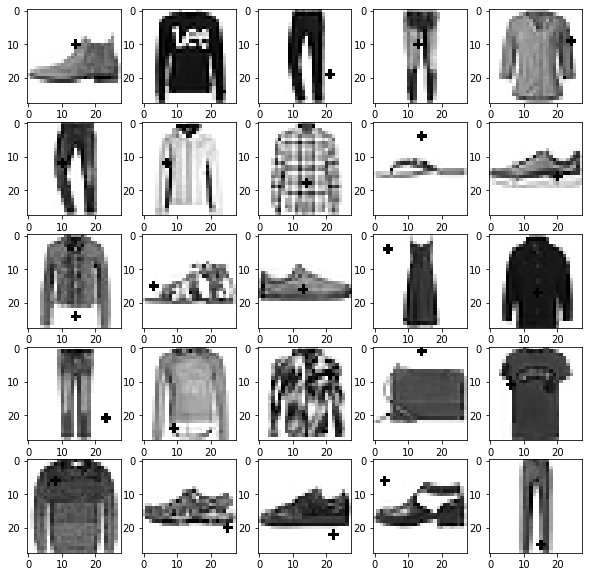

In [4]:
# load_data()로 받은 것은 read only이다 카피해서 write가능하게 한다.
test_x = test_x.copy()
test_y = np.zeros_like(test_y)
def draw_scar(image, size=2):
    x = np.random.randint(0+size, 27-size)
    y = np.random.randint(0+size, 27-size)
    image[y-size:y+size+1,x] = 255
    image[y,x-size:x+size+1] = 255

# 반절을 낙서를 그린다.
for i in range(int(len(test_x)/2)):    
    draw_scar(test_x[i], size=1)
    test_y[i] = 1
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(test_x[i], cmap="binary")

plt.show()

In [5]:
train_x = train_x / 255.
test_x = test_x / 255.
train_x = np.reshape(train_x, (-1, 28, 28, 1))
test_x = np.reshape(test_x, (-1, 28, 28, 1))

convolution을 사용하기 위하여 reshape 해준다.

hist = model.fit(train_x, train_x, epochs=1000, batch_size=1024, validation_split=0.1, callbacks=[early_stopping])
앞의 train_x가 입력, 뒤의 train_x가 출력 

maxpooling으로 차원을 줄여서 latent space에 보내고 upsampling으로 다시 차원수 늘려서 real space로 출력

In [6]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, BatchNormalization

model = Sequential()

model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2), padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2), padding="same"))
model.add(Dense(2))
model.add(Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(1, (3, 3), activation="sigmoid", padding="same"))



model.compile(optimizer='Nadam', loss='binary_crossentropy', metrics=["mape"])

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    verbose=1,
    patience=50)  
hist = model.fit(train_x, train_x, epochs=1000, batch_size=1024, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/1000
53/53 [==============================] - 534s 10s/step - loss: 0.4914 - mape: 105239440.0000 - val_loss: 0.3490 - val_mape: 19421932.0000
Epoch 2/1000
53/53 [==============================] - 523s 10s/step - loss: 0.3360 - mape: 24971366.0000 - val_loss: 0.3111 - val_mape: 16248258.0000
Epoch 3/1000
53/53 [==============================] - 522s 10s/step - loss: 0.3087 - mape: 16449226.0000 - val_loss: 0.3289 - val_mape: 28907158.0000
Epoch 4/1000
53/53 [==============================] - 520s 10s/step - loss: 0.3003 - mape: 14010188.0000 - val_loss: 0.2990 - val_mape: 7774701.5000
Epoch 5/1000
53/53 [==============================] - 519s 10s/step - loss: 0.2923 - mape: 11500563.0000 - val_loss: 0.2932 - val_mape: 15126354.0000
Epoch 6/1000
53/53 [==============================] - 521s 10s/step - loss: 0.2867 - mape: 10014481.0000 - val_loss: 0.2869 - val_mape: 6659648.5000
Epoch 7/1000
53/53 [==============================] - 524s 10s/step - loss: 0.2822 - mape: 8679103.00

train_x 자기 자신에 대하여 학습 시킴